In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.query('TotalCharges == " "')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
# calculating median of TotalCharges 
np.median(df.query('TotalCharges != " "')['TotalCharges'].astype('float'))

1397.475

In [12]:
df['TotalCharges']=df['TotalCharges'].replace(" ","1397.475")
df['TotalCharges']=df['TotalCharges'].astype('float')

In [13]:
df.drop("customerID",axis=1,inplace=True)

In [14]:
# converting senior citizen into category
df['SeniorCitizen'].replace({1:'Yes',0:'No'},inplace=True)

In [15]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [16]:
def plot_cat(feature):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    
    # As there are few columns with 2 uniques values, few with 3 unique values 
    # and one column with 4 unique values so to plot pie chart i have used if statement
    if df[feature].nunique() == 2 :
        a=df[feature].value_counts()[0]
        b=df[feature].value_counts()[1]
        c=df[feature].value_counts().index
        ax=plt.pie(x=[a,b],labels=c,autopct='%1.2f%%')
    elif df[feature].nunique() == 3 :
        a=df[feature].value_counts()[0]
        b=df[feature].value_counts()[1]
        c=df[feature].value_counts()[2]
        d=df[feature].value_counts().index
        ax=plt.pie(x=[a,b,c],labels=d,autopct='%1.2f%%')
    else:
        a=df[feature].value_counts()[0]
        b=df[feature].value_counts()[1]
        c=df[feature].value_counts()[2]
        d=df[feature].value_counts()[3]
        e=df[feature].value_counts().index
        ax=plt.pie(x=[a,b,c,d],labels=e,autopct='%1.2f%%')
        
        
    
    plt.subplot(1,2,2)
    ax=sns.countplot(x=df[feature],hue=df.Churn)
    plt.xticks(rotation=90)


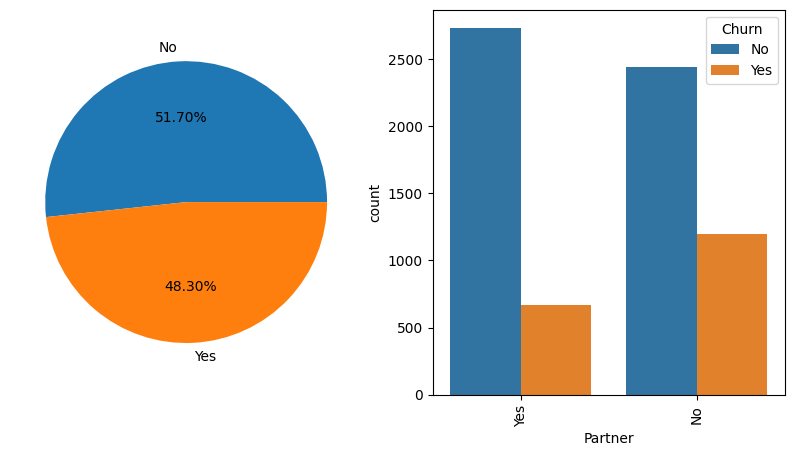

In [17]:
plot_cat('Partner')

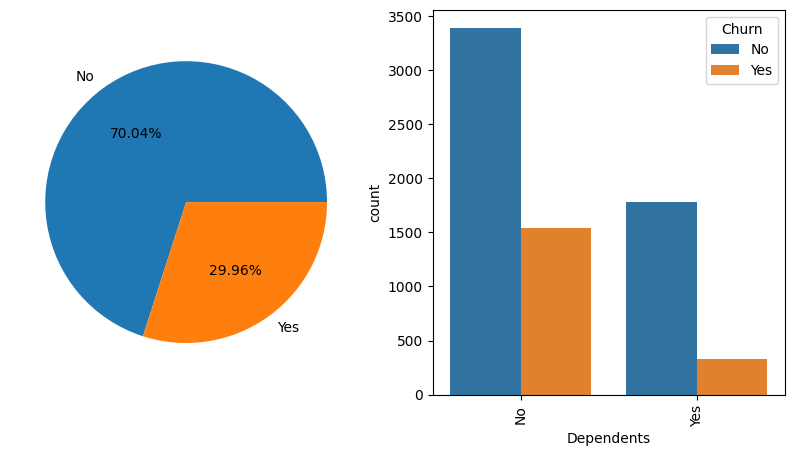

In [18]:
plot_cat('Dependents')


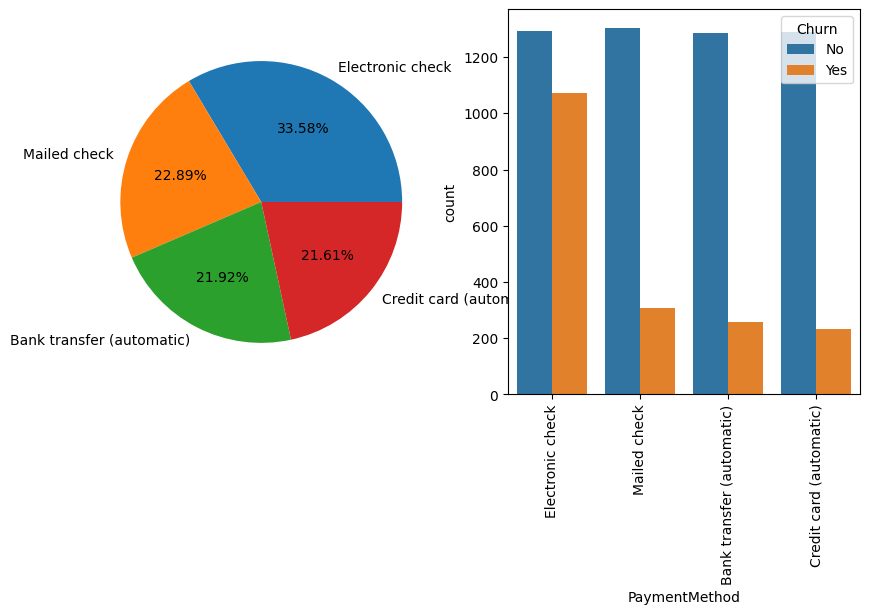

In [19]:
plot_cat('PaymentMethod')

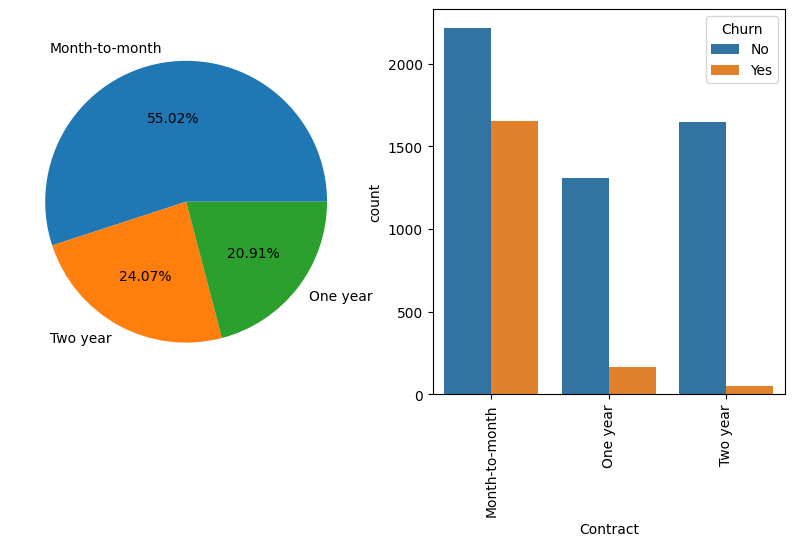

In [20]:
plot_cat('Contract')

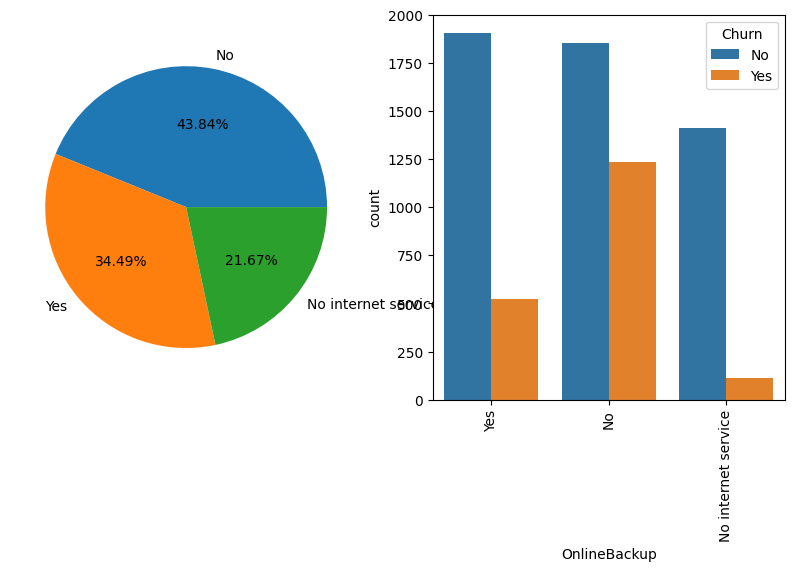

In [21]:
plot_cat('OnlineBackup')

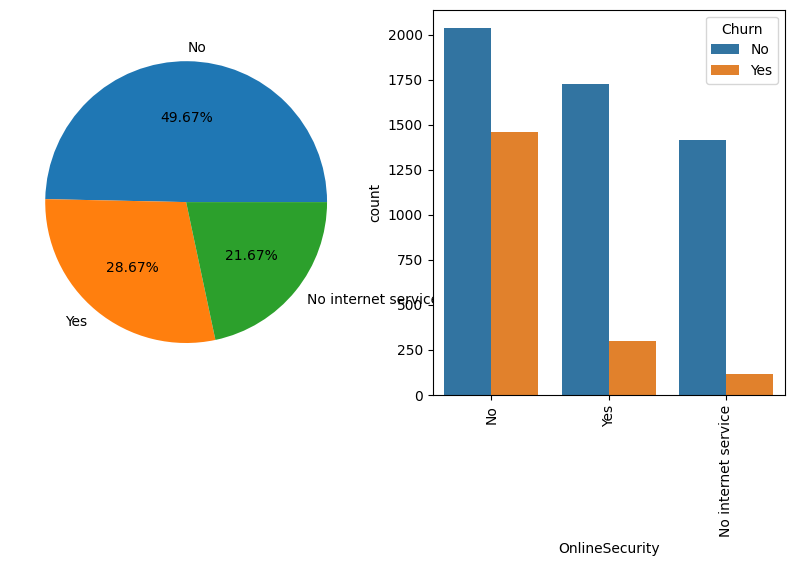

In [22]:
plot_cat('OnlineSecurity')

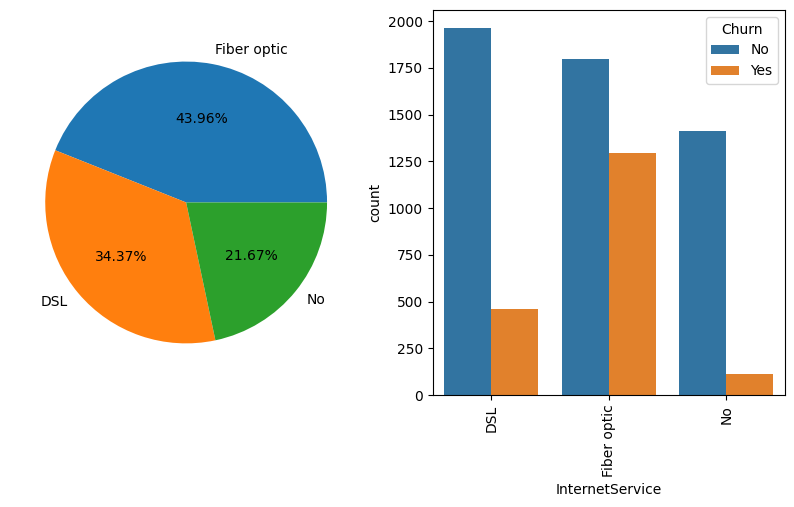

In [23]:
plot_cat('InternetService')

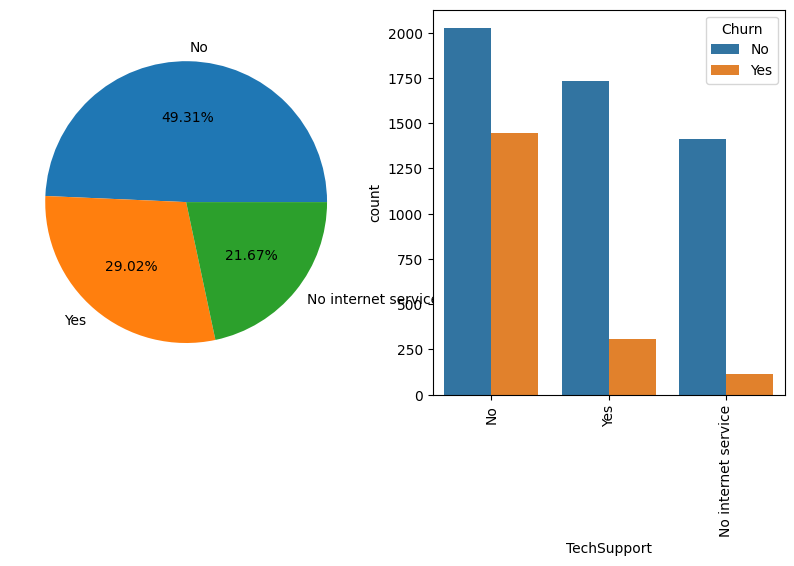

In [24]:
plot_cat('TechSupport')

In [25]:
def plot_num(feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.boxplot(y=df[feature],x=df.Churn)
    plt.subplot(1,2,2)
    sns.histplot(x=df[feature],kde=True)

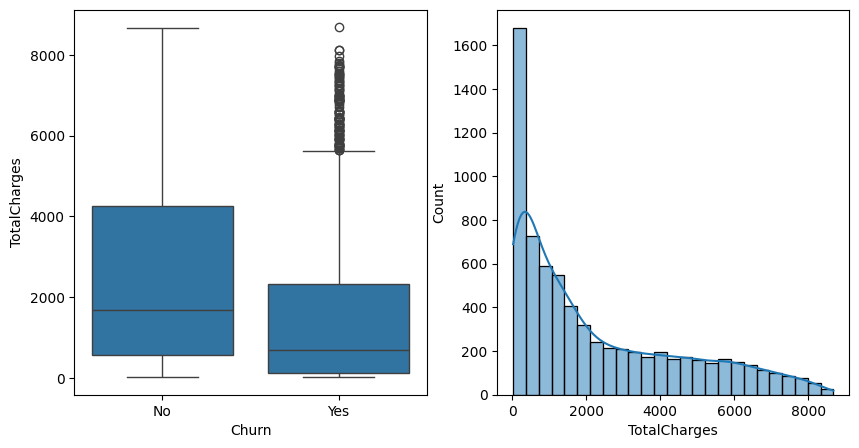

In [26]:
plot_num('TotalCharges')

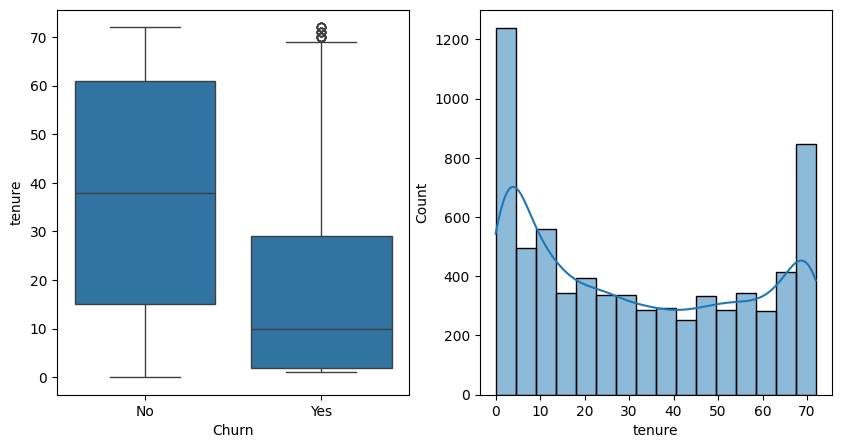

In [27]:
plot_num('tenure')

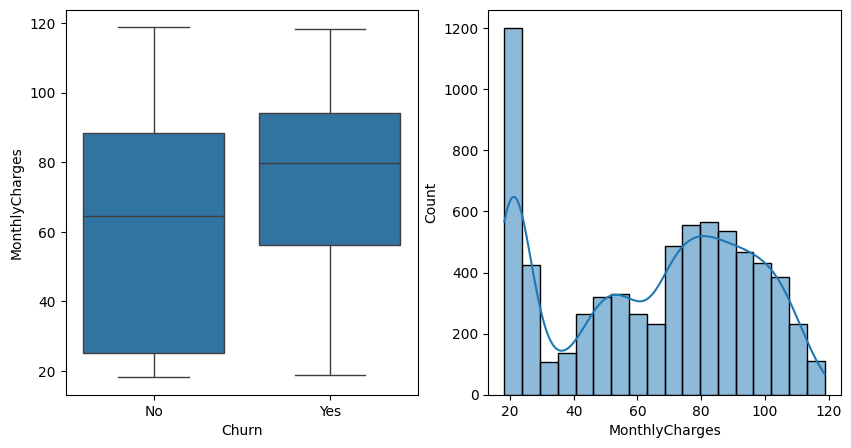

In [28]:
plot_num('MonthlyCharges')


In [29]:
# spliting tenure into bins

#creating label for bins
labels=["{0}-{1}".format(i,i+11) for i in range(1,72,12)] # max of tenure is 72

df['tenure_group']=pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [30]:
df_copy=df.copy()
# dropping tenure column as we have extracted data from it
df_copy.drop('tenure',axis=1,inplace=True)

In [31]:
cat_col=df_copy.select_dtypes(['object','category']).drop('Churn',axis=1)
cat_col.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure_group
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1-12
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,25-36
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1-12
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),37-48
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1-12


In [32]:
le=LabelEncoder()

for i in cat_col.columns:
    df_copy[i]=le.fit_transform(df_copy[i])
    
df_copy['Churn'].replace({'No':0,'Yes':1},inplace=True)

In [33]:
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0,3
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,0


In [34]:
#Feature selection
#Chi square test
features=df_copy.loc[:,cat_col.columns]
target=df_copy['Churn']

select=SelectKBest(score_func = chi2,k = 'all')
best_feature=select.fit(features,target)

<Axes: >

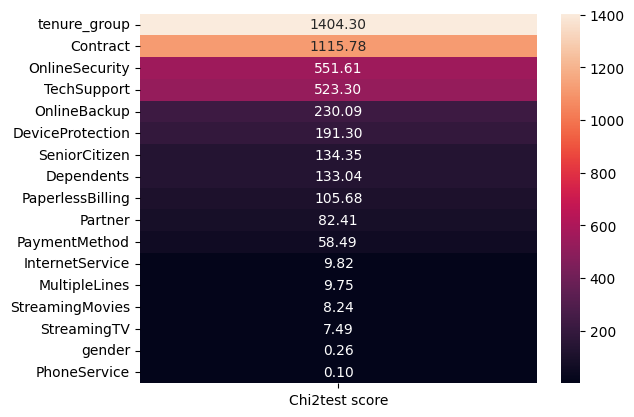

In [35]:
featureScores=pd.DataFrame(index=cat_col.columns,data=best_feature.scores_,columns=['Chi2test score'])
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi2test score'),annot = True,fmt = '0.2f')

In [36]:
#one hot encoding for categorical columns
df_copy=pd.get_dummies(df,columns=cat_col.columns,drop_first=True)

In [37]:
df_copy.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,1,29.85,29.85,No,False,False,True,False,False,True,...,False,True,False,True,False,False,False,False,False,False
1,34,56.95,1889.50,No,True,False,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False
2,2,53.85,108.15,Yes,True,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
3,45,42.30,1840.75,No,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,2,70.70,151.65,Yes,False,False,False,False,True,False,...,False,True,False,True,False,False,False,False,False,False


In [38]:
#Feature Transformation
def tranform(feature):
    print("Skewness before transformation:",df_copy[feature].skew())
    
    plt.figure(figsize=(10,9))
    plt.subplot(2,2,1)
    t1=np.log1p(df_copy[feature])
    print("log tranformation:",t1.skew())
    sns.histplot(t1,kde=True)
    plt.title("log tranformation")
    
    plt.subplot(2,2,2)
    t2=df_copy[feature]**(1/2)
    print("Squre root transformation:",t2.skew())
    sns.histplot(t2,kde=True)
    plt.title("Squre root tranformation")
    
    plt.subplot(2,2,3)
    t3=1/df_copy[feature]
    print("reciprocal transformation:",t3.skew())
    sns.histplot(t3,kde=True)
    plt.title("reciprocal tranformation")
    
    plt.subplot(2,2,4)
    t4=df_copy[feature]**(1/1.2)
    print("Exponentioal transformation:",t4.skew())
    sns.histplot(t4,kde=True)
    plt.title("Exponentioal tranformation")

Skewness before transformation: -0.22052443394398033
log tranformation: -0.719016733039484
Squre root transformation: -0.48455701260718537
reciprocal transformation: 1.1079952670465618
Exponentioal transformation: -0.30958718538385854


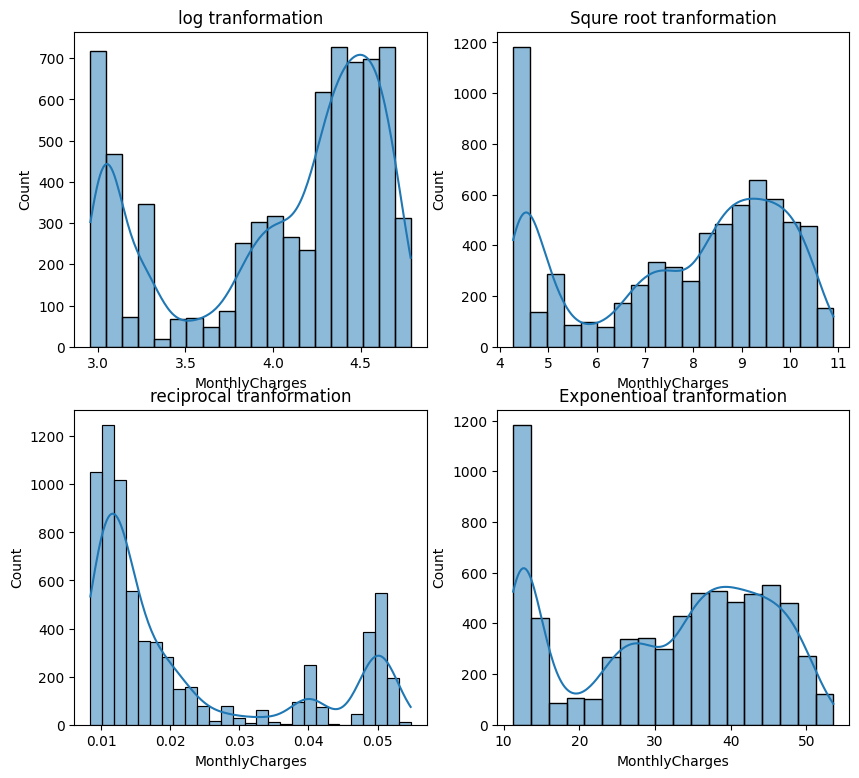

In [39]:
tranform('MonthlyCharges')

Skewness before transformation: 0.9637890936414893
log tranformation: -0.7445016135460706
Squre root transformation: 0.30983834186805154
reciprocal transformation: 3.77900510103796
Exponentioal transformation: 0.7752980782688178


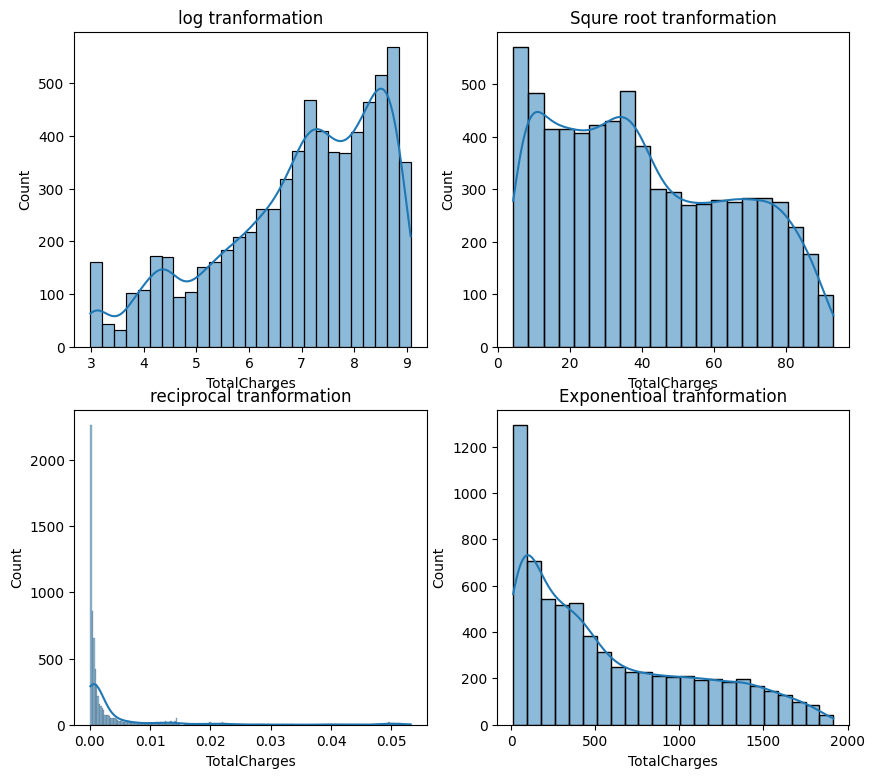

In [40]:
tranform('TotalCharges')

In [41]:
# applying square root transformation on Totalcharges
df_copy['TotalCharges']=np.sqrt(df_copy["TotalCharges"])

In [42]:
#Splitting data
X=df_copy.drop('Churn',axis=1)
Y=df_copy['Churn']

In [43]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.75,stratify=Y)

In [44]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5282, 35)
(5282,)
(1761, 35)
(1761,)


In [45]:
#Oversampling
print(y_train.value_counts())

# counts before smote oversampling

Churn
No     3880
Yes    1402
Name: count, dtype: int64


In [46]:
smote=SMOTE()
x_rec,y_rec=smote.fit_resample(x_train,y_train)

In [47]:
print(y_rec.value_counts())
# counts after smote 

Churn
No     3880
Yes    3880
Name: count, dtype: int64


In [48]:
#Feature scaling
sc=StandardScaler()
x_rec=sc.fit_transform(x_rec)
x_test=sc.transform(x_test)

In [49]:
tr=[]
ts=[]
def build_model(model):
    model.fit(x_rec,y_rec)
    y_tr_pred= model.predict(x_rec)
    y_ts_pred=model.predict(x_test)
    train_acc=accuracy_score(y_rec,y_tr_pred)
    test_acc=accuracy_score(y_test,y_ts_pred)
    print("training accuracy:",train_acc)
    print("testing accuracy:",test_acc)
    print(classification_report(y_test,y_ts_pred))  
    tr.append(train_acc)
    ts.append(test_acc)

In [50]:
lr=LogisticRegression()
build_model(lr)

training accuracy: 0.8333762886597939
testing accuracy: 0.7853492333901193
              precision    recall  f1-score   support

          No       0.86      0.84      0.85      1294
         Yes       0.59      0.63      0.61       467

    accuracy                           0.79      1761
   macro avg       0.73      0.74      0.73      1761
weighted avg       0.79      0.79      0.79      1761



In [51]:
dtc=DecisionTreeClassifier()
build_model(dtc)

training accuracy: 0.9985824742268041
testing accuracy: 0.7160704145371948
              precision    recall  f1-score   support

          No       0.83      0.78      0.80      1294
         Yes       0.47      0.55      0.51       467

    accuracy                           0.72      1761
   macro avg       0.65      0.66      0.65      1761
weighted avg       0.73      0.72      0.72      1761



In [57]:
rfc=RandomForestClassifier()
build_model(rfc)

training accuracy: 0.9984536082474227
testing accuracy: 0.7728563316297559
              precision    recall  f1-score   support

          No       0.85      0.84      0.85      1294
         Yes       0.57      0.58      0.57       467

    accuracy                           0.77      1761
   macro avg       0.71      0.71      0.71      1761
weighted avg       0.77      0.77      0.77      1761



In [53]:
adc=AdaBoostClassifier(n_estimators=50,learning_rate=1.0,algorithm='SAMME.R')
build_model(adc)

training accuracy: 0.8134020618556701
testing accuracy: 0.7660420215786485
              precision    recall  f1-score   support

          No       0.87      0.80      0.83      1294
         Yes       0.55      0.68      0.61       467

    accuracy                           0.77      1761
   macro avg       0.71      0.74      0.72      1761
weighted avg       0.79      0.77      0.77      1761



In [54]:
gbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100)
build_model(gbc)

training accuracy: 0.8443298969072165
testing accuracy: 0.7796706416808632
              precision    recall  f1-score   support

          No       0.88      0.81      0.84      1294
         Yes       0.57      0.70      0.63       467

    accuracy                           0.78      1761
   macro avg       0.73      0.75      0.74      1761
weighted avg       0.80      0.78      0.79      1761



In [55]:
algo=['LogisticRegression','DecisionTreeClassifier',',RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier']

performance=pd.DataFrame(
{
   'algorithm':algo,
    'training accuracy':tr,
    'testing accuracy':ts
})

<Axes: xlabel='algorithm'>

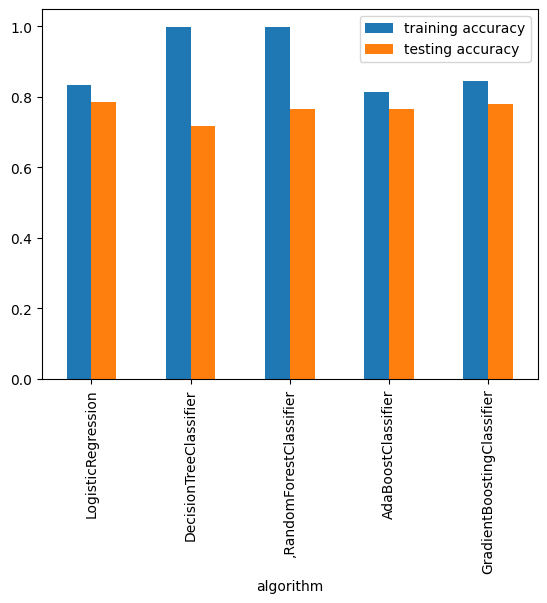

In [56]:
performance.plot(x='algorithm',y=['training accuracy','testing accuracy'],kind='bar')